<a href="https://colab.research.google.com/github/adityabattula/NIFTY-50-INFY-_StockMarket/blob/main/INFY_50_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import pickle
import seaborn as sns


# Importing the dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/adityabattula/NIFTY-50-INFY-_StockMarket/main/INFY.csv")
df = pd.DataFrame(data)

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [ ]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,INFY,EQ,1333.80,1332.25,1351.3,1321.00,1345.0,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
5302,2021-04-27,INFY,EQ,1343.55,1346.00,1353.0,1340.15,1347.5,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
5303,2021-04-28,INFY,EQ,1348.50,1358.00,1359.5,1344.60,1355.8,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856
5304,2021-04-29,INFY,EQ,1356.00,1368.00,1369.0,1351.40,1356.0,1356.35,1360.05,5412357,7.361090e+14,119277.0,3130945.0,0.5785
5305,2021-04-30,INFY,EQ,1356.35,1346.30,1373.9,1345.90,1348.6,1354.35,1361.16,8354677,1.137203e+15,131718.0,5408113.0,0.6473


# DATA DESCRIBED

In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.797000e+03,4797.000000
mean,2584.356643,2584.665266,2626.204297,2539.065002,2581.678345,2581.885215,2582.749548,2.622813e+06,3.855758e+14,1.118490e+05,1.574596e+06,0.536366
std,1796.807396,1796.731660,1842.170527,1743.052412,1789.259360,1789.462674,1792.981289,4.202984e+06,3.808224e+14,9.020307e+04,2.269940e+06,0.179496
min,526.450000,509.250000,558.000000,509.250000,529.150000,526.450000,531.330000,3.291000e+03,2.933192e+12,1.350000e+03,4.352000e+03,0.045800
25%,1216.062500,1213.675000,1233.675000,1197.925000,1215.750000,1216.062500,1214.647500,7.166842e+05,2.065910e+14,5.922600e+04,4.074360e+05,0.455700
50%,2265.675000,2265.000000,2294.300000,2232.475000,2263.275000,2265.575000,2262.210000,1.210798e+06,2.911119e+14,9.025650e+04,8.011600e+05,0.579900
75%,3170.562500,3174.762500,3210.037500,3124.575000,3170.750000,3169.350000,3168.457500,2.784006e+06,4.335687e+14,1.354770e+05,1.986846e+06,0.663700
max,16855.900000,16800.000000,16875.250000,16253.000000,16875.250000,16855.900000,16646.380000,9.043339e+07,8.323905e+15,1.643015e+06,5.775916e+07,0.996000


In [ ]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [ ]:
df.drop(df.columns[[0,1,2]],axis=1,inplace=True)


# FILLING NULL VALUES USING MEAN

# The volume-weighted average price (VWAP) is a technical analysis indicator used on intraday charts that resets at the start of every new trading session.

In [ ]:

data.fillna(data.mean(),inplace=True)



<ipython-input-9-a64c3c260c71>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


In [ ]:
df.isnull().sum()

Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

# DELETING FEATURES

In [ ]:
df.tail()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,1333.80,1332.25,1351.3,1321.00,1345.0,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
5302,1343.55,1346.00,1353.0,1340.15,1347.5,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
5303,1348.50,1358.00,1359.5,1344.60,1355.8,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856
5304,1356.00,1368.00,1369.0,1351.40,1356.0,1356.35,1360.05,5412357,7.361090e+14,119277.0,3130945.0,0.5785
5305,1356.35,1346.30,1373.9,1345.90,1348.6,1354.35,1361.16,8354677,1.137203e+15,131718.0,5408113.0,0.6473


In [ ]:
df = df.drop('%Deliverble', axis=1)


In [ ]:
df.head()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
0,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN
1,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN
2,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN
3,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN
4,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN


In [ ]:
df = df.drop(columns=['Trades'])


In [ ]:
df.rename(columns = {'Prev Close':'PClose'}, inplace = True)


In [ ]:
df.head()

,PClose,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume
0,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN
1,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN
2,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN
3,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN
4,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN


In [ ]:
df.drop(df.columns[9:],axis=1,inplace=True)

In [ ]:
df.head()

,PClose,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12
1,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13
2,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14
3,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14
4,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12


In [ ]:
df.isnull().sum()

PClose      0
Open        0
High        0
Low         0
Last        0
Close       0
VWAP        0
Volume      0
Turnover    0
dtype: int64

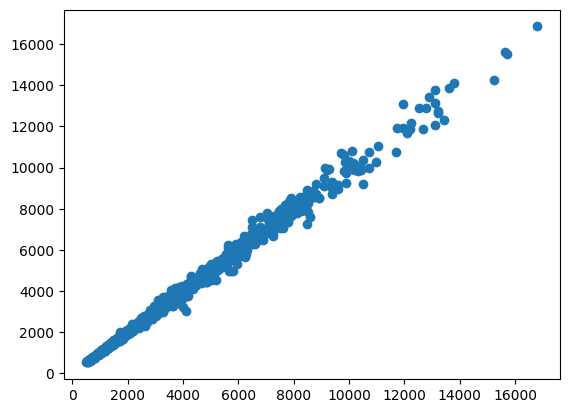

In [ ]:
plt.scatter(df.Open,df.Close)
plt.show()

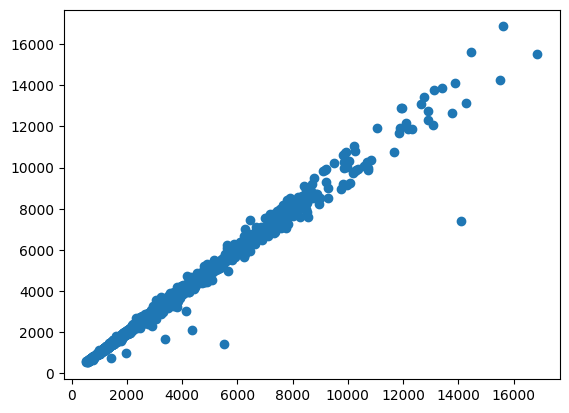

In [ ]:
plt.scatter(df.PClose,df.Close)
plt.show()

# Data Splitting

In [ ]:
df.describe()

,PClose,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03
mean,2584.356643,2584.665266,2626.204297,2539.065002,2581.678345,2581.885215,2582.749548,2.622813e+06,3.855758e+14
std,1796.807396,1796.731660,1842.170527,1743.052412,1789.259360,1789.462674,1792.981289,4.202984e+06,3.808224e+14
min,526.450000,509.250000,558.000000,509.250000,529.150000,526.450000,531.330000,3.291000e+03,2.933192e+12
25%,1216.062500,1213.675000,1233.675000,1197.925000,1215.750000,1216.062500,1214.647500,7.166842e+05,2.065910e+14
50%,2265.675000,2265.000000,2294.300000,2232.475000,2263.275000,2265.575000,2262.210000,1.210798e+06,2.911119e+14
75%,3170.562500,3174.762500,3210.037500,3124.575000,3170.750000,3169.350000,3168.457500,2.784006e+06,4.335687e+14
max,16855.900000,16800.000000,16875.250000,16253.000000,16875.250000,16855.900000,16646.380000,9.043339e+07,8.323905e+15


In [ ]:
x = df[["PClose","Open","High","Low","Last","VWAP","Turnover"]]
y = df["Close"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=0)

In [ ]:
X_train.head()

,PClose,Open,High,Low,Last,VWAP,Turnover
2379,1721.15,1712.80,1774.9,1701.10,1768.6,1756.57,1.811246e+14
3827,1993.65,1993.65,1994.6,1942.00,1946.9,1954.77,4.048763e+14
4125,1079.90,1070.00,1079.9,1066.70,1074.5,1070.52,5.024245e+14
5003,777.30,774.00,778.0,769.75,773.0,772.86,2.958264e+14
4016,1108.55,1111.00,1113.0,1071.15,1078.8,1089.29,2.839988e+14


In [ ]:
X_test.head()

,PClose,Open,High,Low,Last,VWAP,Turnover
3655,3548.95,3548.95,3608.00,3548.00,3596.00,3590.92,2.179260e+14
29,9945.75,10741.45,10741.45,10741.45,10741.45,10741.45,2.549268e+13
5135,948.80,947.00,952.00,939.20,948.55,946.24,5.486819e+14
3671,3641.30,3646.00,3690.50,3623.60,3654.00,3657.57,2.301940e+14
4681,683.55,688.70,695.05,673.80,680.50,679.08,4.531381e+14


In [ ]:
Y_train.head()

2379    1770.10
3827    1947.10
4125    1072.45
5003     773.20
4016    1078.65
Name: Close, dtype: float64

In [ ]:
df.shape

(5306, 9)

In [ ]:
X_train.shape

(3979, 7)

# Model Training


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-8.58841272e-04 -5.97016949e-02  4.08427242e-02  3.57626605e-02
  8.62392015e-01  1.21449674e-01 -3.40005801e-16]


In [ ]:
print(regressor.intercept_)

0.5072821219691832


In [ ]:
predicted = regressor.predict(X_test)

In [ ]:
print(predicted)

[ 3597.03108858 10741.41324222   948.38140289 ...  1620.58812106
  1238.61700609   666.9844192 ]


In [ ]:
df = pd.DataFrame(Y_test,predicted)

In [ ]:
dfr = pd.DataFrame({"Actual_Price":Y_test,"Predicted_Price":predicted})

In [ ]:
dfr.head()

,Actual_Price,Predicted_Price
3655,3601.00,3597.031089
29,10741.45,10741.413242
5135,947.40,948.381403
3671,3651.25,3655.340093
4681,679.95,680.466021


In [ ]:
r2_score(Y_test,predicted)

0.999944186940058

In [ ]:
mean_squared_error(Y_test,predicted)

186.27873174078738

In [ ]:
mean_absolute_error(Y_test,predicted)

6.027276447548173